In [4441]:
import numpy as np
import pandas as pd

In [4442]:
df = pd.read_csv('diabetes.csv')

In [4443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4444]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4445]:
# bmi float
# 18.5 >= bmi  (ozgin)
# 18.5 < bmi <= 25 (normal weight)
# 25 < bmi <= 35   (semiz)
# 35 < bmi (vashe semiz)

In [4446]:
# insulin
# median = 125


In [4447]:
# yana 2 ta columni shunaqa qilaman

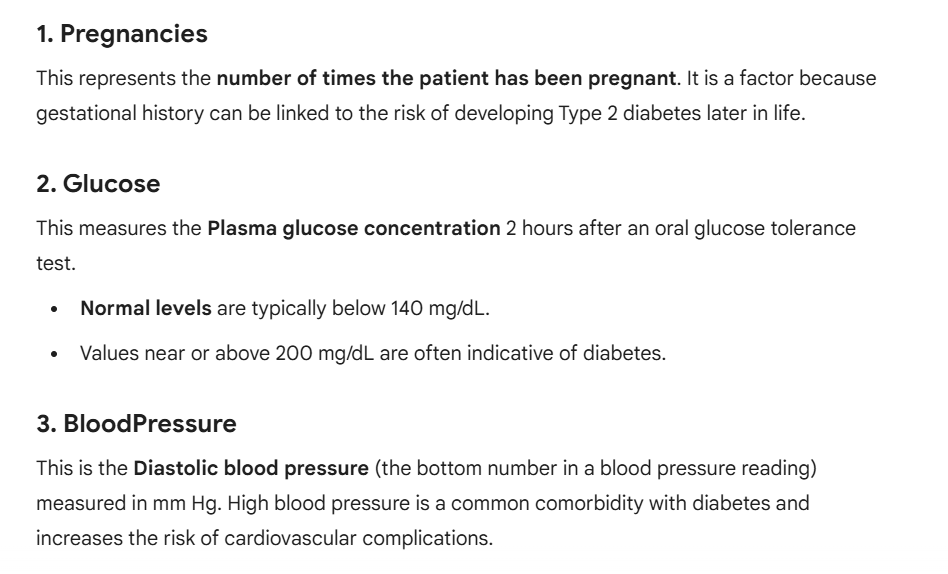

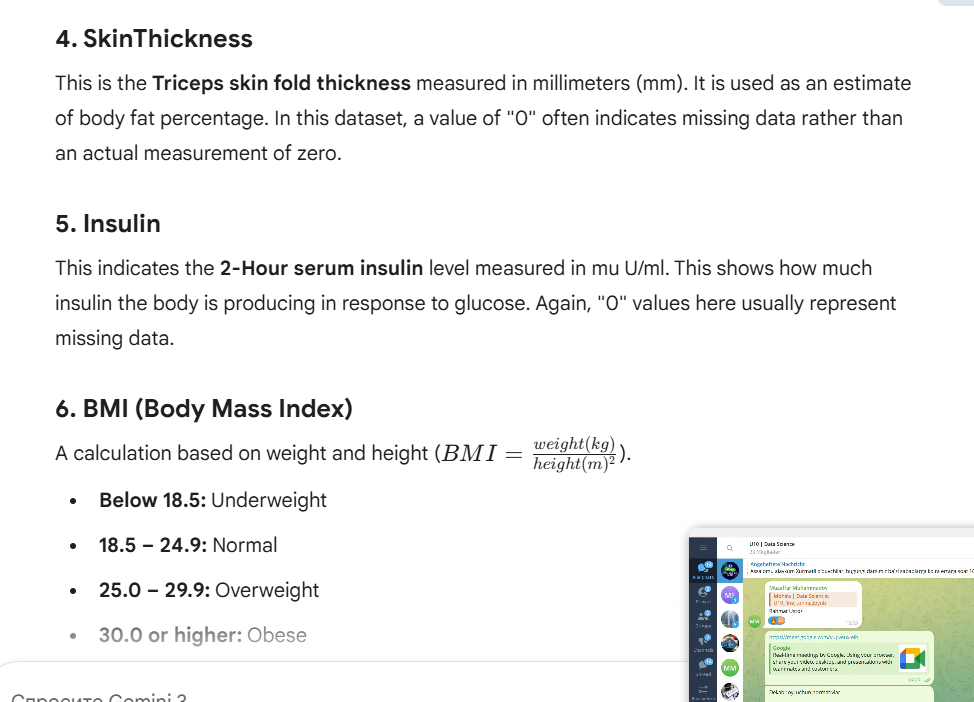

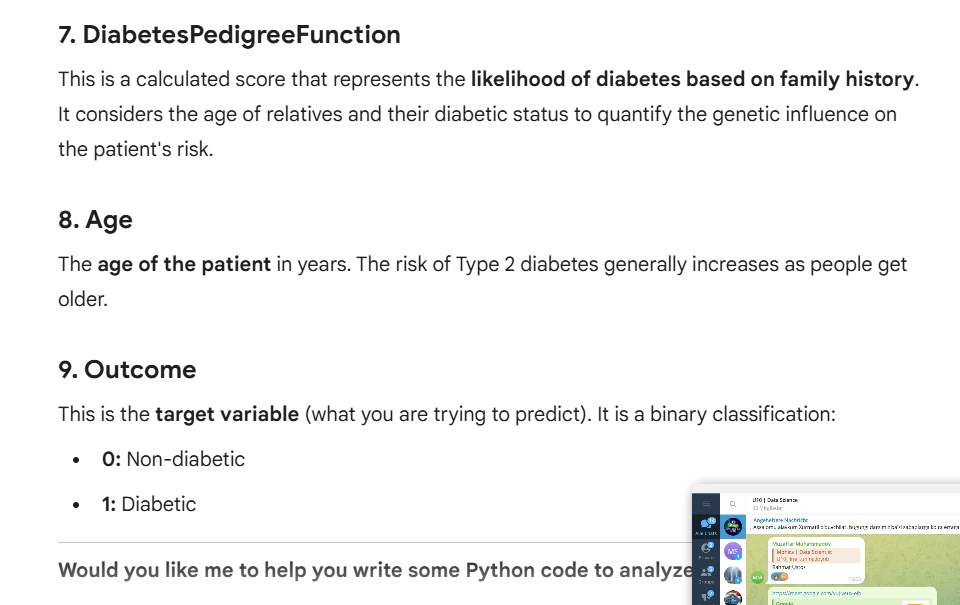

In [4448]:
df['Insulin'].mean()

np.float64(79.79947916666667)

In [4449]:
df['Insulin'].value_counts()

,count
Insulin,
0,374
105,11
130,9
140,9
120,8
...,...
178,1
127,1
510,1


In [4450]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [4451]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4452]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [4453]:
df['Insulin'] = pd.to_numeric(df['Insulin'], errors='coerce')
df['Insulin'] = df['Insulin'].replace(0, np.nan)

In [4454]:
df['Insulin'].value_counts(dropna=False) # value_counts NAN ni hide qiladi uni ichiga dropna = false qse korsatadi


,count
Insulin,
NaN,374
105.0,11
130.0,9
140.0,9
120.0,8
...,...
178.0,1
127.0,1
510.0,1


In [4455]:
median_insulin = df['Insulin'].median()
print(median_insulin)
df['Insulin'] = df['Insulin'].fillna(median_insulin)

125.0


In [4456]:
df['Insulin'].value_counts()

,count
Insulin,
125.0,378
105.0,11
140.0,9
130.0,9
120.0,8
...,...
178.0,1
127.0,1
510.0,1


In [4457]:
df['Insulin'].value_counts()

,count
Insulin,
125.0,378
105.0,11
140.0,9
130.0,9
120.0,8
...,...
178.0,1
127.0,1
510.0,1


In [4458]:
# get dummies ni ishlataman

In [4459]:
max_insulin = df['Insulin'].max()
min_insulin = df['Insulin'].min()

print(max_insulin)
print(min_insulin)

846.0
14.0


In [4460]:
# df['Insulin_Group'] = np.where(df['Insulin'] <= 125, 0, 1)
# what are you doing are you changing below 125 to 0, over 125 to 1 yeah

In [4461]:
df['Insulin_Group'] = np.where(df['Insulin'] <= 125, 0, 1)

In [4462]:
df['Insulin_Group'].value_counts()

,count
Insulin_Group,
0,572
1,196


In [4463]:
df.drop('Insulin', axis = 1, inplace = True)

In [4464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
 8   Insulin_Group             768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


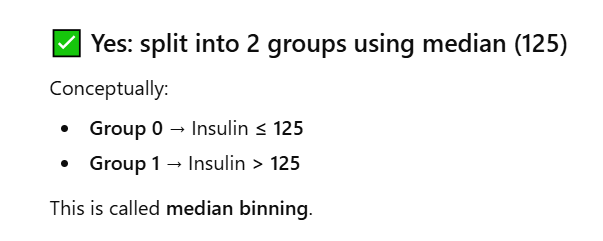

In [4465]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_Group
0,6,148,72,35,33.6,0.627,50,1,0
1,1,85,66,29,26.6,0.351,31,0,0
2,8,183,64,0,23.3,0.672,32,1,0
3,1,89,66,23,28.1,0.167,21,0,0
4,0,137,40,35,43.1,2.288,33,1,1


In [4466]:
# bmi float
# 18.5 >= bmi  (ozgin)
# 18.5 < bmi <= 25 (normal weight)
# 25 < bmi <= 30   (semiz)
# 35 < bmi (vashe semiz)

In [4467]:
df['BMI_Group'] = pd.cut(
    df['BMI'],
    bins=[0, 18.5, 25, 30, np.inf],
    labels=['Thin', 'Normal', 'Overweight', 'Obese']
)


In [4468]:
df['BMI_Group'].value_counts()

,count
BMI_Group,
Obese,465
Overweight,180
Normal,108
Thin,4


In [4469]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_Group,BMI_Group
0,6,148,72,35,33.6,0.627,50,1,0,Obese
1,1,85,66,29,26.6,0.351,31,0,0,Overweight
2,8,183,64,0,23.3,0.672,32,1,0,Normal
3,1,89,66,23,28.1,0.167,21,0,0,Overweight
4,0,137,40,35,43.1,2.288,33,1,1,Obese


In [4470]:
df.drop('BMI', axis = 1, inplace = True)

In [4471]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age,Outcome,Insulin_Group,BMI_Group
0,6,148,72,35,0.627,50,1,0,Obese
1,1,85,66,29,0.351,31,0,0,Overweight
2,8,183,64,0,0.672,32,1,0,Normal
3,1,89,66,23,0.167,21,0,0,Overweight
4,0,137,40,35,2.288,33,1,1,Obese


In [4472]:
df['DiabetesPedigreeFunction'].value_counts()

,count
DiabetesPedigreeFunction,
0.258,6
0.254,6
0.207,5
0.261,5
0.259,5
...,...
0.565,1
0.118,1
0.177,1


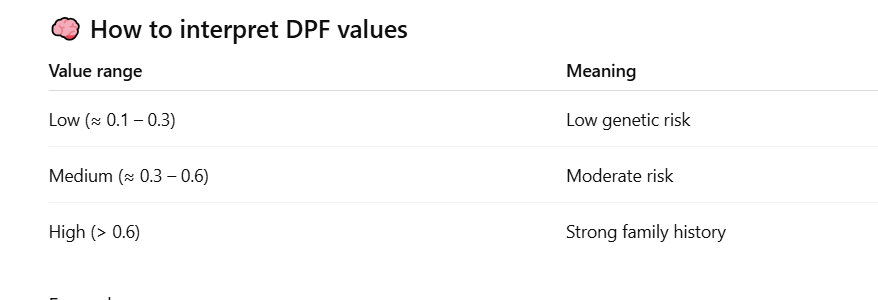

In [4473]:
df['Insulin_Group'].value_counts()

,count
Insulin_Group,
0,572
1,196


In [4474]:
# df['SkinThickness'].value_counts()

In [4475]:
df['SkinThickness'] = df['SkinThickness'].replace(0,np.nan)
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
skin_median = df['SkinThickness'].median()
print(skin_median)

29.0


In [4476]:
# df['SkinThickness'].value_counts()

In [4477]:
df['BloodPressure'].value_counts()

,count
BloodPressure,
70,57
74,52
78,45
68,45
72,44
64,43
80,40
76,39
60,37


In [4478]:
df['BloodPressure'].max()

122

In [4479]:
df['BloodPressure'].min()

0

In [4480]:

df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())

# Bins: 0-80 (Normal/Low), 80-122 (High)
bins = [0, 80, 122]
labels = ['Low/Normal', 'High']

df['Blood_pressure_Group'] = pd.cut(df['BloodPressure'], bins=bins, labels=labels)



In [4481]:
print(df['Blood_pressure_Group'].value_counts())

Blood_pressure_Group
Low/Normal    603
High          165
Name: count, dtype: int64


In [4482]:
df.head()

/usr/local/lib/python3.12/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,Pregnancies,Glucose,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age,Outcome,Insulin_Group,BMI_Group,Blood_pressure_Group
0,6,148,72.0,35.0,0.627,50,1,0,Obese,Low/Normal
1,1,85,66.0,29.0,0.351,31,0,0,Overweight,Low/Normal
2,8,183,64.0,29.0,0.672,32,1,0,Normal,Low/Normal
3,1,89,66.0,23.0,0.167,21,0,0,Overweight,Low/Normal
4,0,137,40.0,35.0,2.288,33,1,1,Obese,Low/Normal


In [4483]:
df.drop('BloodPressure', axis = 1, inplace = True)

In [4484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   SkinThickness             768 non-null    float64 
 3   DiabetesPedigreeFunction  768 non-null    float64 
 4   Age                       768 non-null    int64   
 5   Outcome                   768 non-null    int64   
 6   Insulin_Group             768 non-null    int64   
 7   BMI_Group                 757 non-null    category
 8   Blood_pressure_Group      768 non-null    category
dtypes: category(2), float64(2), int64(5)
memory usage: 43.9 KB


In [4485]:
# df['Age'].value_counts()

In [4486]:
df['Glucose'].value_counts()

,count
Glucose,
99,17
100,17
111,14
125,14
129,14
...,...
56,1
169,1
149,1


In [4487]:
df['Pregnancies'].value_counts()

,count
Pregnancies,
1,135
0,111
2,103
3,75
4,68
5,57
6,50
7,45
8,38


In [4488]:

df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())

# 3. Create the 2 groups (0 for Normal, 1 for High)
df['Glucose_Class'] = np.where(df['Glucose'] < 140, 'Normal', 'High')



In [4489]:
df['Glucose_Class'].value_counts()

,count
Glucose_Class,
Normal,571
High,197


In [4490]:
df.head()

,Pregnancies,Glucose,SkinThickness,DiabetesPedigreeFunction,Age,Outcome,Insulin_Group,BMI_Group,Blood_pressure_Group,Glucose_Class
0,6,148.0,35.0,0.627,50,1,0,Obese,Low/Normal,High
1,1,85.0,29.0,0.351,31,0,0,Overweight,Low/Normal,Normal
2,8,183.0,29.0,0.672,32,1,0,Normal,Low/Normal,High
3,1,89.0,23.0,0.167,21,0,0,Overweight,Low/Normal,Normal
4,0,137.0,35.0,2.288,33,1,1,Obese,Low/Normal,Normal


In [4491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    float64 
 2   SkinThickness             768 non-null    float64 
 3   DiabetesPedigreeFunction  768 non-null    float64 
 4   Age                       768 non-null    int64   
 5   Outcome                   768 non-null    int64   
 6   Insulin_Group             768 non-null    int64   
 7   BMI_Group                 757 non-null    category
 8   Blood_pressure_Group      768 non-null    category
 9   Glucose_Class             768 non-null    object  
dtypes: category(2), float64(3), int64(4), object(1)
memory usage: 49.9+ KB


In [4492]:
df.drop('Glucose', axis = 1, inplace = True)

In [4493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   SkinThickness             768 non-null    float64 
 2   DiabetesPedigreeFunction  768 non-null    float64 
 3   Age                       768 non-null    int64   
 4   Outcome                   768 non-null    int64   
 5   Insulin_Group             768 non-null    int64   
 6   BMI_Group                 757 non-null    category
 7   Blood_pressure_Group      768 non-null    category
 8   Glucose_Class             768 non-null    object  
dtypes: category(2), float64(2), int64(4), object(1)
memory usage: 43.9+ KB


In [4494]:
df['BMI_Group'].value_counts()

,count
BMI_Group,
Obese,465
Overweight,180
Normal,108
Thin,4


In [4495]:
# Fill the 11 missing values with the most frequent group ('Obese')
df['BMI_Group'] = df['BMI_Group'].fillna(df['BMI_Group'].mode()[0])

In [4496]:
df['BMI_Group'].value_counts()

,count
BMI_Group,
Obese,476
Overweight,180
Normal,108
Thin,4


In [4497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   SkinThickness             768 non-null    float64 
 2   DiabetesPedigreeFunction  768 non-null    float64 
 3   Age                       768 non-null    int64   
 4   Outcome                   768 non-null    int64   
 5   Insulin_Group             768 non-null    int64   
 6   BMI_Group                 768 non-null    category
 7   Blood_pressure_Group      768 non-null    category
 8   Glucose_Class             768 non-null    object  
dtypes: category(2), float64(2), int64(4), object(1)
memory usage: 43.9+ KB


In [4498]:
df['Glucose_Class'] = df['Glucose_Class'].astype('category')


In [4499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   SkinThickness             768 non-null    float64 
 2   DiabetesPedigreeFunction  768 non-null    float64 
 3   Age                       768 non-null    int64   
 4   Outcome                   768 non-null    int64   
 5   Insulin_Group             768 non-null    int64   
 6   BMI_Group                 768 non-null    category
 7   Blood_pressure_Group      768 non-null    category
 8   Glucose_Class             768 non-null    category
dtypes: category(3), float64(2), int64(4)
memory usage: 38.8 KB


In [4500]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [4501]:
# 19. Matnni raqamga o‘tkazish:
# pd.get_dummies(df['Gender'])

In [4502]:
# BMI_Group
# Blood_pressure_Group
# Glucose_Class
# get_dummies

In [4503]:
# cols_to_encode = ['BMI_Group', 'Glucose_Class', 'Blood_pressure_Group']

# # 2. Use pd.get_dummies on the whole dataframe
# # This will remove the old columns and add new ones like BMI_Group_Obese, BMI_Group_Normal, etc.
# df = pd.get_dummies(df, columns=cols_to_encode)

# # 3. Now your dataframe is all numbers and ready for SMOTE!
# print(df.columns)

In [4504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   SkinThickness             768 non-null    float64 
 2   DiabetesPedigreeFunction  768 non-null    float64 
 3   Age                       768 non-null    int64   
 4   Outcome                   768 non-null    int64   
 5   Insulin_Group             768 non-null    int64   
 6   BMI_Group                 768 non-null    category
 7   Blood_pressure_Group      768 non-null    category
 8   Glucose_Class             768 non-null    category
dtypes: category(3), float64(2), int64(4)
memory usage: 38.8 KB


In [4505]:
# ML PART with KNN

In [4506]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, jaccard_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer



In [4507]:
x = df.drop('Outcome', axis = 1)  # feature
y = df['Outcome']                 # target

In [4508]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 42, stratify = y)

In [4509]:
sc = StandardScaler()
oe = OneHotEncoder(drop = 'first', sparse_output = False, handle_unknown = 'ignore')

In [4510]:
# numerical_feat = x_train.select_dtypes(include = ['float64', 'int64']).columns
# cat_feat = x_train.select_dtypes(include = 'category').columns

cat_feat = x_train.select_dtypes(exclude=['number']).columns # sondan tashqari hammasi cat_feat ga tushadi
numerical_feat = x_train.select_dtypes(include=['number']).columns

In [4511]:
# This prints columns that are NOT numbers
print("Columns that SMOTE cannot read:")
print(x_train.select_dtypes(exclude=['number']).columns.tolist())

Columns that SMOTE cannot read:
['BMI_Group', 'Blood_pressure_Group', 'Glucose_Class']


In [4512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   SkinThickness             768 non-null    float64 
 2   DiabetesPedigreeFunction  768 non-null    float64 
 3   Age                       768 non-null    int64   
 4   Outcome                   768 non-null    int64   
 5   Insulin_Group             768 non-null    int64   
 6   BMI_Group                 768 non-null    category
 7   Blood_pressure_Group      768 non-null    category
 8   Glucose_Class             768 non-null    category
dtypes: category(3), float64(2), int64(4)
memory usage: 38.8 KB


In [4513]:
preprocessor = ColumnTransformer(
    transformers = [
                     ('num', sc, numerical_feat),
                     ('cat', oe, cat_feat)
    ]
)

In [4514]:
x_train_ready = preprocessor.fit_transform(x_train)
x_test_ready = preprocessor.transform(x_test)

In [4515]:
# ! pip install -U imbalanced-learn
# imbalance ni oldini olish uchun
from imblearn.over_sampling import SMOTE


# SMOTE with moderate oversampling
smote = SMOTE(sampling_strategy=1, random_state = 42)
x_resampled, y_resampled = smote.fit_resample(x_train_ready, y_train)


In [4516]:
print(f"Old x_train_ready shape: {x_train_ready.shape}")
print(f"New x_resampled shape: {x_resampled.shape}")

print(f"Old y_train_ready shape: {y_train.shape}")
print(f"New y_resampled shape: {y_resampled.shape}")

Old x_train_ready shape: (614, 10)
New x_resampled shape: (800, 10)
Old y_train_ready shape: (614,)
New y_resampled shape: (800,)


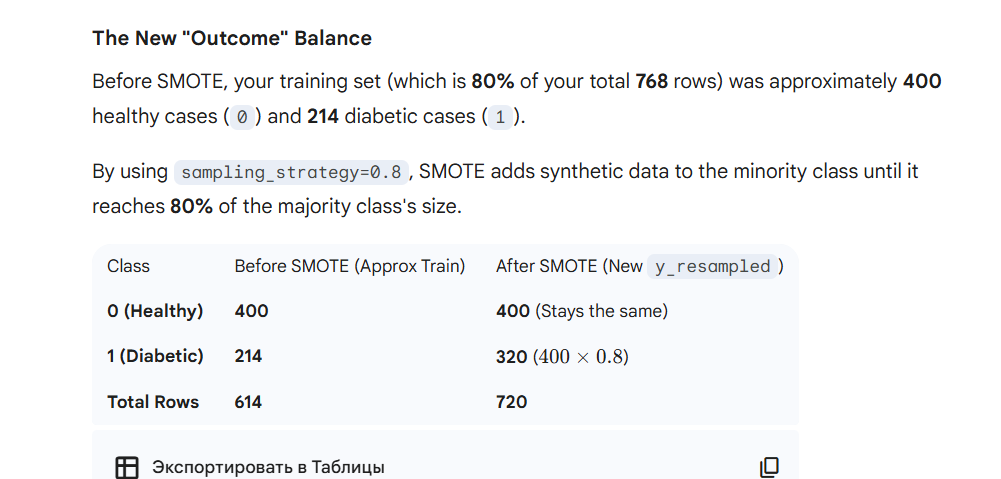

In [4517]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(x_resampled, y_resampled)

KNeighborsClassifier(n_neighbors=7)

In [4518]:
prediction_knn = classifier.predict(x_test_ready)

In [4519]:
print('percentage:', accuracy_score(y_test, prediction_knn) * 100)

percentage: 68.18181818181817


In [4520]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, jaccard_score
print('precision:', precision_score(y_test, prediction_knn))
print('recall:', recall_score(y_test, prediction_knn))
print('f1 score:', f1_score(y_test, prediction_knn))

precision: 0.5362318840579711
recall: 0.6851851851851852
f1 score: 0.6016260162601627


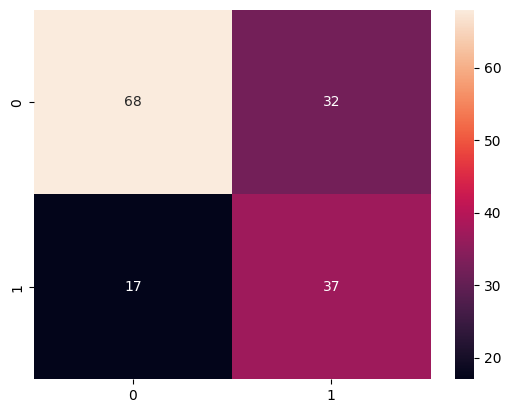

In [4521]:
sns.heatmap(confusion_matrix(y_test, prediction_knn), annot=True)
plt.show()

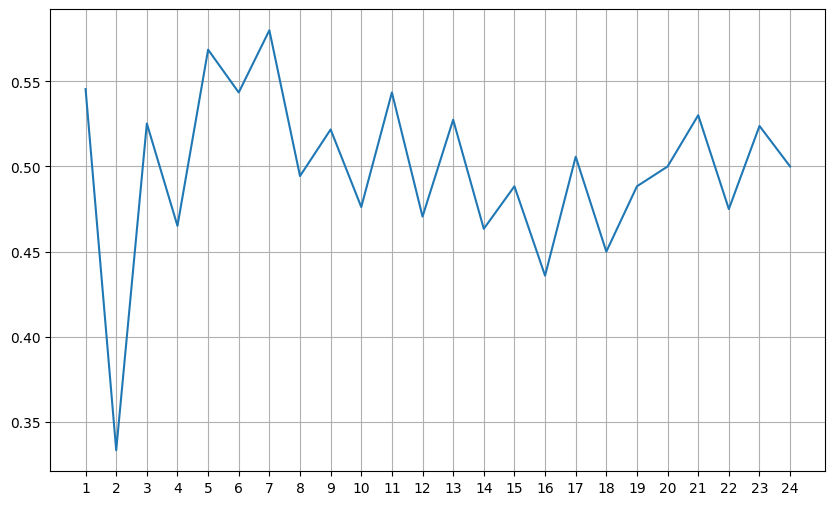

In [4522]:
f1 = []
for k in range(1, 25):
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(x_train_ready, y_train)
  prediction_knn = classifier.predict(x_test_ready)
  f1.append(f1_score(y_test, prediction_knn))


plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), f1)
plt.xticks(range(1, 25))
plt.grid()
plt.show()


In [4523]:
# # Get list of boolean columns
# bool_cols = df.select_dtypes(include='bool').columns

# # Convert to int (True → 1, False → 0)
# df[bool_cols] = df[bool_cols].astype(int)

# # Verify
# df.info()

In [4524]:
# LINEAR REGRESSION

In [4525]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error,mean_absolute_error, root_mean_squared_error
from sklearn.linear_model import LinearRegression

In [4526]:
# classifier.fit(x_resampled, y_resampled)
# prediction = classifier.predict(x_test_ready)

In [4527]:
lr_model = LinearRegression()
lr_model.fit(x_resampled, y_resampled)

LinearRegression()

In [4528]:
prediction_linear = lr_model.predict(x_test_ready)

In [4529]:
mse =  mean_squared_error(y_test, prediction_linear)
mse

0.18777042216923043

In [4530]:
mse = np.sqrt(mse)
mse

np.float64(0.4333248460095849)

In [4531]:
# LOGISTIC REGRESSION

In [4532]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

In [4533]:
logistic_model = LogisticRegression()
logistic_model.fit(x_resampled, y_resampled)

LogisticRegression()

In [4542]:

log_preds = logistic_model.predict(x_test_ready)
print(log_preds)
# 1. Get probabilities instead of hard 0s and 1s
logistic_probs = logistic_model.predict_proba(x_test_ready)

# 2. Calculate Log Loss using those probabilities
from sklearn.metrics import log_loss
correct_loss = log_loss(y_test, logistic_probs)

print(f"Correct Logistic Regression Log Loss: {correct_loss}")

[1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1
 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1
 1 0 0 0 1 0]
Correct Logistic Regression Log Loss: 0.553050433517351


In [4535]:
# Log Loss and Binary Cross-Entropy (BCE) are the exact same thing

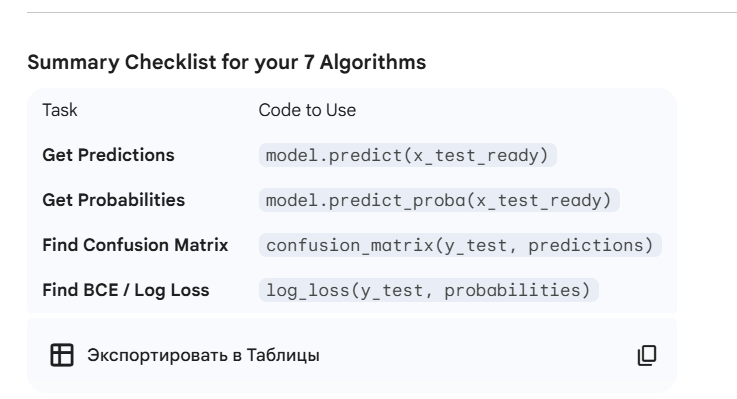

In [4543]:
acc = accuracy_score(y_test, log_preds)
rec = recall_score(y_test, log_preds)
cm = confusion_matrix(y_test, log_preds)

In [4544]:
print('accuracy score: ', acc)
print('recall score: ', rec)
print('confusion_matrix : ', cm)



accuracy score:  0.7272727272727273
recall score:  0.6666666666666666
confusion_matrix :  [[76 24]
 [18 36]]


In [4537]:
# RANDOM FOREST

In [4568]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_resampled, y_resampled)

RandomForestClassifier()

In [4569]:
# Accuracy, Recall, and the Confusion Matrix.

In [4570]:
prediction_random = random_forest_model.predict(x_test_ready)

In [4571]:
acc_random = accuracy_score(y_test, prediction_random)
rec_random = recall_score(y_test, prediction_random)
cm_random = confusion_matrix(y_test, prediction_random)

In [4572]:
print('accuracy score: ', acc_random)
print('recall score: ', rec_random)
print('confusion_matrix : ', cm_random)

accuracy score:  0.7142857142857143
recall score:  0.5925925925925926
confusion_matrix :  [[78 22]
 [22 32]]


In [4567]:
# decision tree

In [4593]:
decision_model = DecisionTreeClassifier()
decision_model.fit(x_resampled, y_resampled)

DecisionTreeClassifier()

In [4594]:
prediction_decision = decision_model.predict(x_test_ready)

In [4595]:
acc_decision= accuracy_score(y_test, prediction_decision)
rec_decision = recall_score(y_test, prediction_decision)
cm_decision = confusion_matrix(y_test, prediction_decision)

In [4596]:
print('accuracy score: ', acc_decision)
print('recall score: ', rec_decision)
print('confusion_matrix : ', cm_decision)

accuracy score:  0.6623376623376623
recall score:  0.5
confusion_matrix :  [[75 25]
 [27 27]]


In [4596]:
# Gradient Boosting

In [4601]:
gradient_model = GradientBoostingClassifier()
gradient_model.fit(x_resampled, y_resampled)

GradientBoostingClassifier()

In [4602]:
prediction_gradient = gradient_model.predict(x_test_ready)

In [4603]:
acc_gradient= accuracy_score(y_test, prediction_gradient)
rec_gradient = recall_score(y_test, prediction_gradient)
cm_gradient = confusion_matrix(y_test, prediction_gradient)

In [4604]:
print('accuracy score: ', acc_gradient)
print('recall score: ', rec_gradient)
print('confusion_matrix : ', cm_gradient)

accuracy score:  0.7467532467532467
recall score:  0.6666666666666666
confusion_matrix :  [[79 21]
 [18 36]]


In [ ]:
# Bagging  Classifier

In [4617]:
bagging_model = BaggingClassifier()
bagging_model.fit(x_resampled, y_resampled)

BaggingClassifier()

In [4618]:
prediction_bagging = bagging_model.predict(x_test_ready)

In [4619]:
acc_bagging= accuracy_score(y_test, prediction_bagging)
rec_bagging = recall_score(y_test, prediction_bagging)
cm_bagging = confusion_matrix(y_test, prediction_bagging)

In [4620]:
print('accuracy score: ', acc_bagging)
print('recall score: ', rec_bagging)
print('confusion_matrix : ', cm_bagging)

accuracy score:  0.7012987012987013
recall score:  0.5555555555555556
confusion_matrix :  [[78 22]
 [24 30]]
